# **Importing Necessory Libraries and Importing Data From Directory**

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256  # Size of the image
Batch_size = 32   # Batch size for training
EPOCHS = 50       # Number of training epochs
CHANNELS = 3      # Number of color channels (RGB)

In [ ]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Potato Desease",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = Batch_size
)

Found 2157 files belonging to 3 classes.


In [ ]:
for image_batch, label_batch in data_set.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 2 1 1 1 0 1 0 1 0 1 0 2 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0]


In [ ]:
class_names = data_set.class_names

# **Plotting the Data**

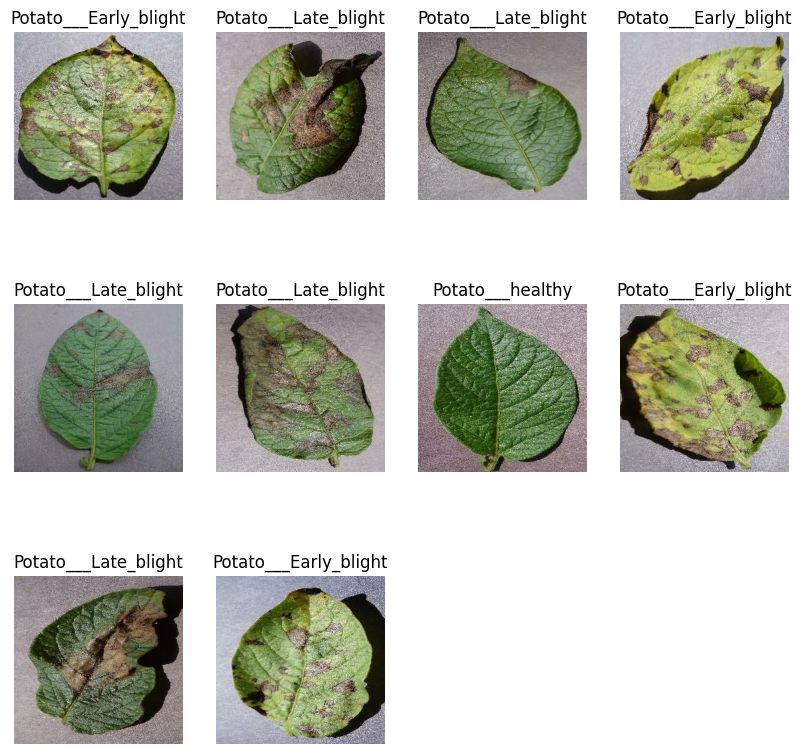

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_set.take(1):
    for i in range(10):
       ax = plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype('uint8'))
       plt.title(class_names[label_batch[i]])

       plt.axis("off")

# **Splitting Data for Training, Testing and for Validation**

In [ ]:
def get_dataset_partition(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=20)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, test_ds, val_ds

In [ ]:
train_ds, test_ds, val_ds = get_dataset_partition(data_set)

In [ ]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

# **Feature Argumentation**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_rescale_image = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augomentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

# **Defining and building a Convolutional Neural Network (CNN)**

In [ ]:
input_shape = (Batch_size, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_rescale_image,
    data_augomentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
54/54 [==============================] - 206s 201ms/step - loss: 0.8581 - accuracy: 0.5735 - val_loss: 0.7452 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 3s 63ms/step - loss: 0.4868 - accuracy: 0.8258 - val_loss: 0.4679 - val_accuracy: 0.8542
Epoch 3/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3716 - accuracy: 0.8501 - val_loss: 0.2631 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3070 - accuracy: 0.8762 - val_loss: 0.2779 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2146 - accuracy: 0.9190 - val_loss: 0.2100 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2179 - accuracy: 0.9120 - val_loss: 0.2022 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 3s 59ms/step - loss: 0.2181 - accuracy: 0.9132 - val_loss: 0.2448 - val_accuracy: 0.9062
Epoch 8/50

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 8s 20ms/step - loss: 0.3672 - accuracy: 0.8945


# **Plotting the Model Accuracy and Loss**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

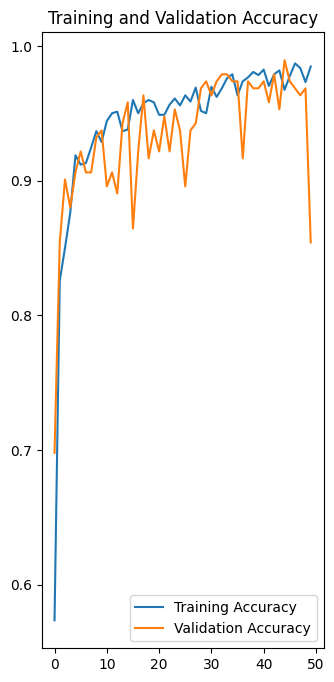

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


Text(0.5, 1.0, 'Training and Validation Loss')

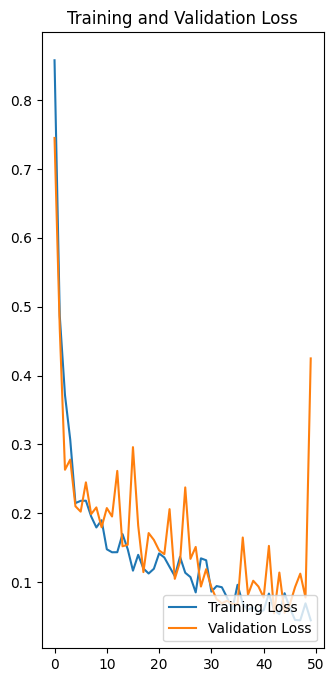

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

# **Comparining The Actual with Predicted**

Print Image to Predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 39ms/step
Predicted Label: Potato___Late_blight


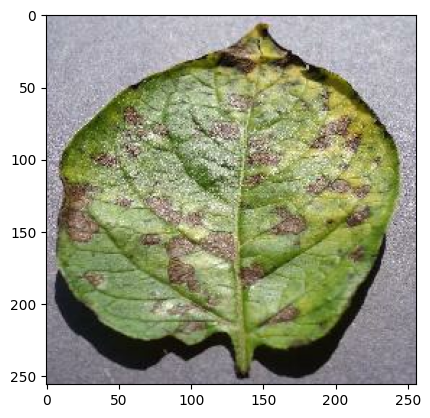

In [36]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_batch = labels_batch[0]

  print('Print Image to Predict')
  plt.imshow(first_image)
  print('Actual Label:', class_names[first_batch])

  batch_prediction = model.predict(images_batch)
  print('Predicted Label:', class_names[np.argmax(batch_prediction[2])])


In [37]:
def predict(model, image):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

# Compairing the Actual with Predicted with **Confidence**

1/1 [==============================] - 0s 18ms/step


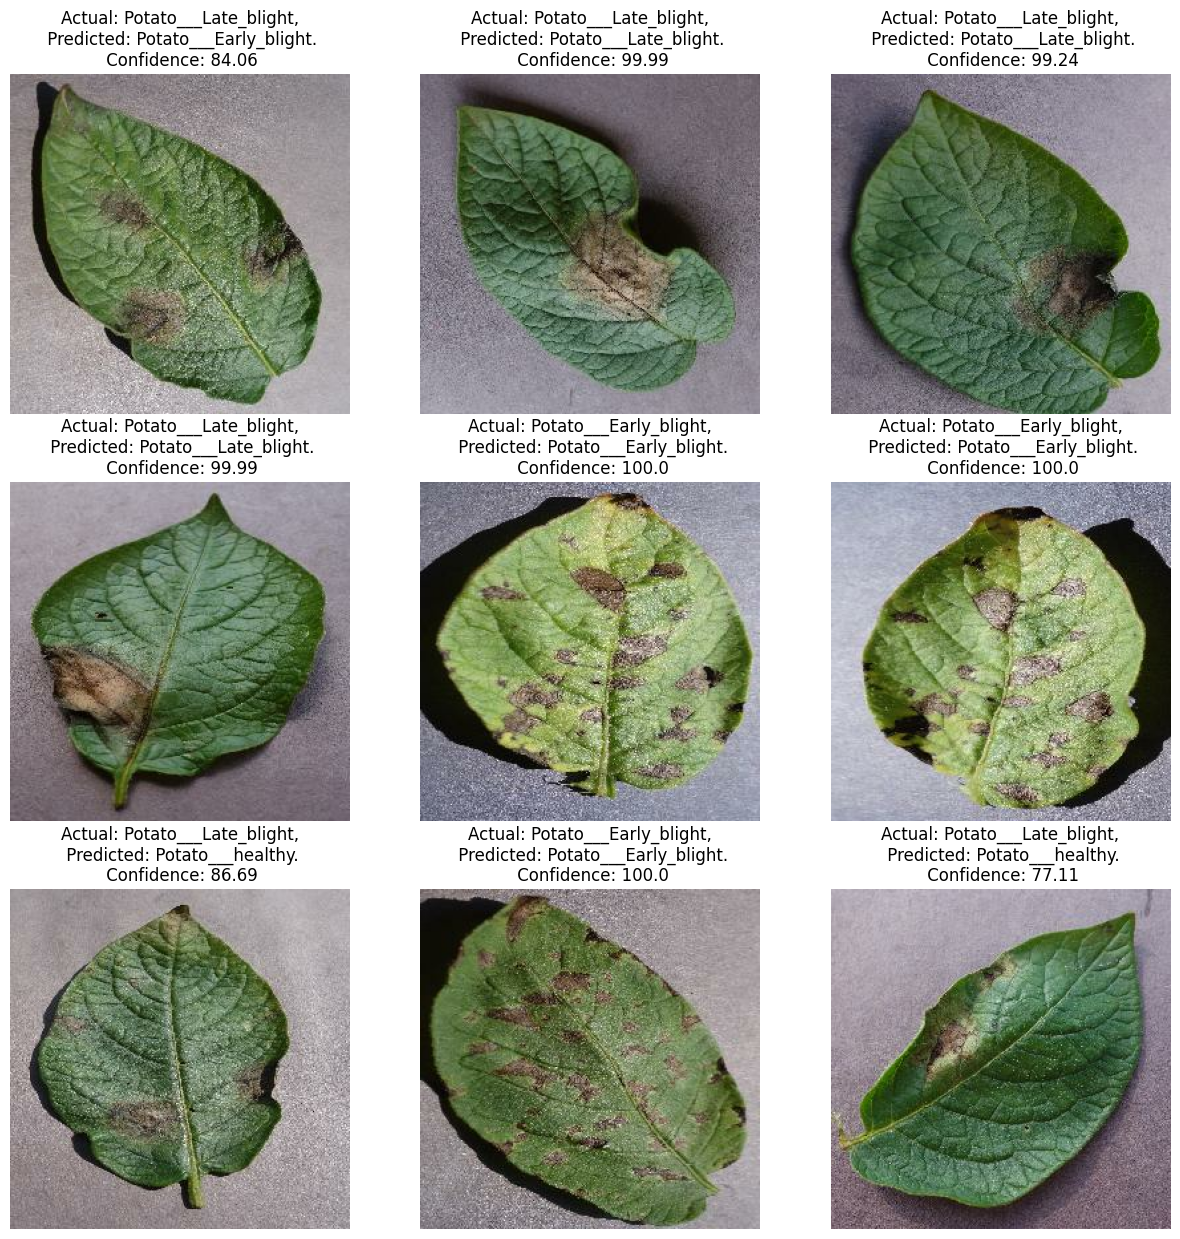

In [43]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))


    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}')

    plt.axis('off')

In [46]:
model_version = 1
model.save(f'..model/{model_version}')

In [49]:
model_version = 3
model.save(f'/content/drive/My Drive/model_3{model_version}')

In [51]:
import os

model_version = max([int(i) for i in os.listdir('/content/drive/My Drive/model') + [0]])+1
model.save(f'/content/drive/My Drive/model_3{model_version}')
